In [107]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
!pip install certifi chardet click easydict h5py~=2.7 intel-openmp imgaug ipython ipython-genutils matplotlib==3.0.3 moviepy numpy==1.16.4 opencv-python~=3.4 pandas patsy 
!pip install python-dateutil pyyaml>=5.1 requests ruamel.yaml~=0.15 setuptools scikit-image scikit-learn scipy six statsmodels tables tensorpack>=0.9.7.1 tqdm wheel
%tensorflow_version 1.x
import numpy as np
import time
import sys
import os
import importlib

from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

from google.colab import output
def alert_done():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/3/3e/Accept_7_%28Gravity_Sound%29.wav").play()')

os.environ["DLClight"]="True"
%cd drive/My\ Drive/Development/DeepLabCut
import deeplabcut
from deadROMM import possumPolish

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Development/DeepLabCut'
/content/drive/My Drive/Development/DeepLabCut


In [108]:
root = '/content/drive/My Drive/Development/DeepLabCut'

importlib.reload(possumPolish)
model = possumPolish.Project()
config_path = model.load('./deadROMM/profiles-colab.yaml','dv101right', './dev/possum101right_biceps_triceps-Phil-2020-06-08/config.yaml') #101R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv101left', './dev/possum101_11Apr-Phil-2020-04-13-diff/config.yaml') #101L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv92', './dev/dv92_biceps_3pec_delt-Phil-2020-06-09/config.yaml') #92
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85left', './dev/dv85_left_biceps_teres_lat-Phil-2020-06-09/config.yaml') #85L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv85right', './dev/dv85_right_triceps_lat-Phil-2020-06-09/config.yaml') #85R
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88left', './dev/dv88_left_teresmaj_pec-Phil-2020-06-09/config.yaml') #88L
# config_path = model.load('./deadROMM/profiles-colab.yaml','dv88right', './dev/dv88_trilong_pec-Phil-2020-06-09/config.yaml') #88R
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm105', './dev/sm105-Phil-2020-06-09/config.yaml') #105
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm108', './dev/sm108-Phil-2020-06-09/config.yaml') #108
# config_path = model.load('./deadROMM/profiles-colab.yaml','sm126', './dev/sm126-Phil-2020-06-09/config.yaml') #126

# model.importXma(next(iter(model.config['history'].keys())))  #e.g. './dev/dv92_biceps...' no quotes
# model.dlc.create_training_dataset(model.yaml)

config_path = model.load('./deadROMM/profiles-colab.yaml','dv101right', './dev/TESTpossum101right_biceps_triceps-Phil-2020-06-08/config.yaml') #101R
alert_done()

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:170: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  profiles = ruamel.yaml.load(open(self.profile_path))


Loaded profile dv101right
Generated absolute paths to project directories
Successfully loaded profile dv101right
Loaded profile dv101right
Generated absolute paths to project directories
Successfully loaded profile dv101right


In [ ]:
from scipy import stats

# point to list of extracted outliers (both cams)
def findBlanks(files, return_indices=False):
  pngs = [file for file in files if os.path.splitext(file)[1]=='.png']
  filesizes = [os.stat(file).st_size for file in pngs]
  z = stats.zscore(filesizes)
  dictionary = {k:[v1,v2] for (k,v1,v2) in zip(pngs, filesizes, z)}
  blanks = [key for key in dictionary.keys() if dictionary[key][1]<0]
  if return_indices:
    result = [os.path.splitext(os.path.basename(file))[0][3:] for file in blanks]
    return result
  else:
    return blanks

def exciseRevise(indices):
  model.config = ruamel.yaml.load(open(model.yaml))
  files_to_delete = []
  list_of_files = []
  for event in model.config['history']:
    for file 
 



  



In [ ]:
abc = {'b':'fg','g':'fg'}
lista = [key for key in abc.keys()]
lista

['b', 'g']

In [ ]:
findBlanks(model.config['history']['15Jul20_21h30m33s']['files']+model.config['history']['15Jul20_21h31m20s']['files'])

['./dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img06406.png',
 './dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img04002.png',
 './dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img06409.png',
 './dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img04004.png',
 './dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img00800.png',
 './dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/16Apr_diff/img06408.png']

In [ ]:
model.config['history']

{'08Jun20_21h06m29s': {'files': ['/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c1_16Apr/img00805.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c1_16Apr/img09764.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c2_16Apr/img02446.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c1_16Apr/img03669.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c1_16Apr/img00741.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c1_16Apr/img01285.png',
   '/content/drive/My Drive/Development/DeepLabCut/dev/possum101right_biceps_triceps-Phil-2020-06-08/labeled-data/c2_16Apr/img07016.png',
   '

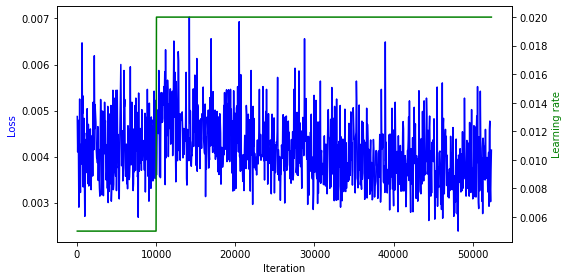

/content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/evaluation-results/  already exists!
/content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/evaluation-results/iteration-0/sm126Jun9-trainset95shuffle1  already exists!
Running  DLC_resnet50_sm126Jun9shuffle1_90000  with # of trainingiterations: 90000
This net has already been evaluated!
Using snapshot-90000 for model /content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/dlc-models/iteration-0/sm126Jun9-trainset95shuffle1
Initializing ResNet
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/dlc-models/iteration-0/sm126Jun9-trainset95shuffle1/train/snapshot-90000


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/dlc-models/iteration-0/sm126Jun9-trainset95shuffle1/train/snapshot-90000


Starting to analyze %  videos/1Nov_diff.mp4
Loading  videos/1Nov_diff.mp4


  0%|          | 0/8800 [00:00<?, ?it/s]

Duration of video [s]:  293.33 , recorded with  30.0 fps!
Overall # of frames:  8800  found with (before cropping) frame dimensions:  1024 1024
Starting to extract posture


8888it [06:58, 21.25it/s]


Detected frames:  8800
Saving results in videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


In [ ]:
model.evaluateAndAnalyze()

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:261: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Updated numframes2pick in config.yaml
{0: 'Body_ds_lat_crn_cam1', 1: 'Body_ds_lat_crn_cam2', 2: 'Body_vn1_crn_cam1', 3: 'Body_vn1_crn_cam2', 4: 'Body_vn3_cdl_cam1', 5: 'Body_vn3_cdl_cam2', 6: 'Scapula_acrR_cam1', 7: 'Scapula_acrR_cam2', 8: 'Scapula_crnR_cam1', 9: 'Scapula_crnR_cam2', 10: 'Scapula_cdlR_cam1', 11: 'Scapula_cdlR_cam2', 12: 'Humerus_dpcR_cam1', 13: 'Humerus_dpcR_cam2', 14: 'Humerus_entR_cam1', 15: 'Humerus_entR_cam2', 16: 'Humerus_ectR_cam1', 17: 'Humerus_ectR_cam2', 18: 'Ulna_olcR_cam1', 19: 'Ulna_olcR_cam2', 20: 'Ulna_intR_cam1', 21: 'Ulna_intR_cam2', 22: 'Ulna_dstR_cam1', 23: 'Ulna_dstR_cam2', 24: 'Triceps_prxR_cam1', 25: 'Triceps_prxR_cam2', 26: 'Triceps_dstR_cam1', 27: 'Triceps_dstR_cam2', 28: 'Lat_dstR_cam1', 29: 'Lat_dstR_cam2', 30: 'Body_ds_cdl_cam1', 31: 'Body_ds_cdl_cam2', 32: 'Biceps_prxR_cam1', 33: 'Biceps_prxR_cam2', 34: 'Biceps_dstR_cam1', 35: 'Biceps_dstR_cam2', 36: 'Scapula_accR_cam1', 37: 'Scapula_accR_cam2', 38: 'Scapula_crnL_cam1', 39: 'Scapula_crnL_cam2

0it [00:00, ?it/s]

Method  jump  found  3957  putative outlier frames.
Do you want to proceed with extracting  10  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, epsilon, comparisonbodyparts) or use a different method.
Frames from video 1Nov_diff  already extracted (more will be added)!
Loading video...
Duration of video [s]:  293.3333333333333 , recorded @  30.0 fps!
Overall # of frames:  8800 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 293.33  seconds.
Extracting and downsampling... 3957  frames from the video.


3957it [06:31, 10.12it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [2203, 5879, 4509, 6865, 2913, 3752, 1108, 2560, 2419, 6710]
Creating the symbolic link of the video
AUTOMATIC ADDING OF VIDEO TO CONFIG FILE FAILED! You need to do this manually for including it in the config.yaml file!
Videopath: videos/1Nov_diff.mp4 Coordinates for cropping: None
The outlier frames are extracted. They are stored in the subdirectory labeled-data\1Nov_diff.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Function <function extract_outlier_frames at 0x7f1f765c8f28> created 12 new files in directory ./dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff
Updated config.yaml with event outliers_cam1 at 16Jul20_02h30m51s
Method  jump  found  3401  putative outlier frames.
Do you want to proceed with extracting  10  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, epsilon, comparisonbodyparts) or use a different me

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:261: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))
3it [00:00, 28.74it/s]

Duration of video [s]:  293.3333333333333 , recorded @  30.0 fps!
Overall # of frames:  8800 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 293.33  seconds.
Extracting and downsampling... 3401  frames from the video.


3401it [05:39, 10.02it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [8033, 810, 5306, 728, 383, 2448, 7153, 4443, 843, 5972]


/content/drive/My Drive/Development/DeepLabCut/deeplabcut/refine_training_dataset/outlier_frames.py:463: UserWarning: /content/drive/My Drive/Development/DeepLabCut/dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/img0810.png is a low contrast image
  io.imsave(imagename1,image)


Creating the symbolic link of the video
AUTOMATIC ADDING OF VIDEO TO CONFIG FILE FAILED! You need to do this manually for including it in the config.yaml file!
Videopath: videos/1Nov_diff.mp4 Coordinates for cropping: None
The outlier frames are extracted. They are stored in the subdirectory labeled-data\1Nov_diff.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Function <function extract_outlier_frames at 0x7f1f765c8f28> created 10 new files in directory ./dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff
Updated config.yaml with event outliers_cam2 at 16Jul20_02h37m40s
hello1
['./dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/img6865.png', './dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/img2913.png', './dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/machinelabels-iter0.h5', './dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/img2203.png', './dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/machinelabels.csv', './dev/sm126-Phil-2020

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:261: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


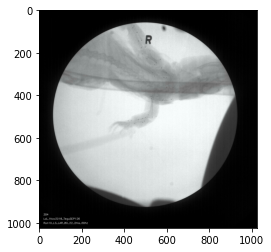

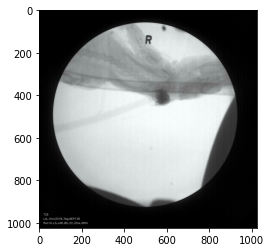

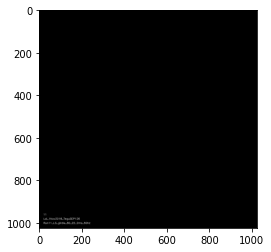

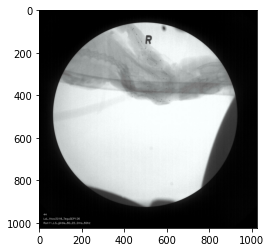

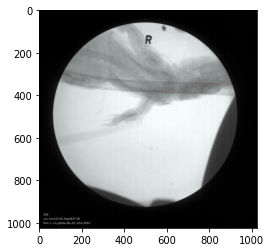

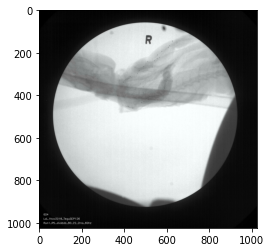

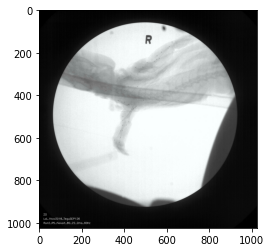

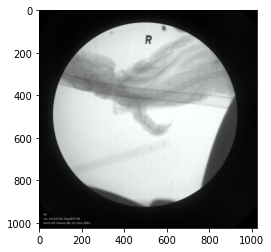

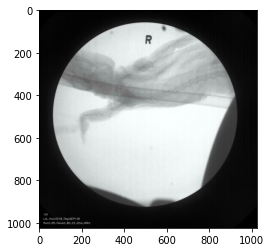

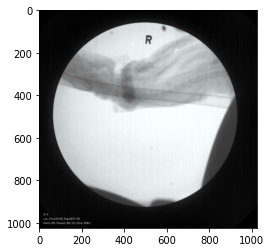

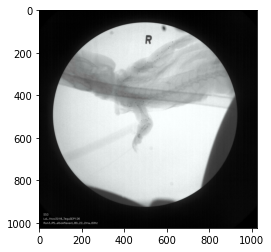

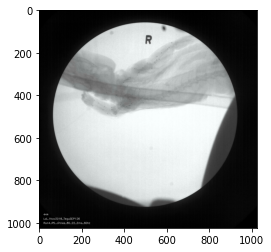

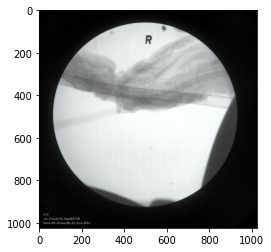

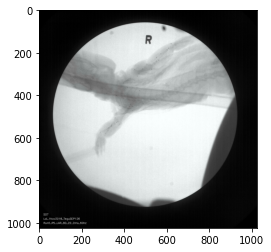

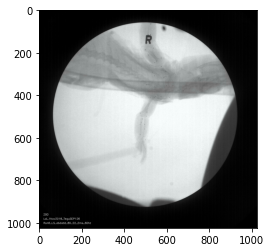

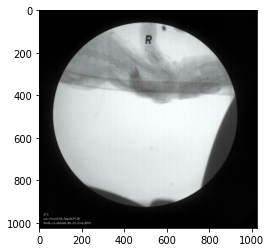

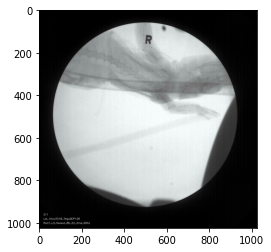

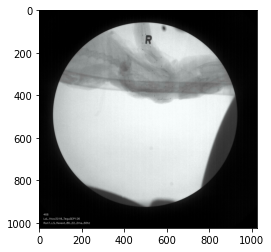

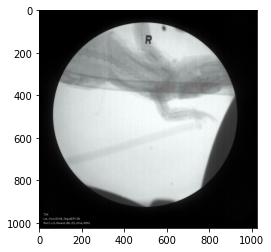

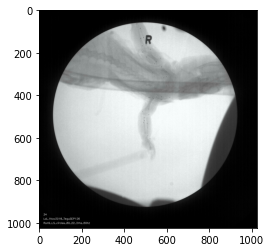

Finished extracting .pngs from c1_1Nov.mp4


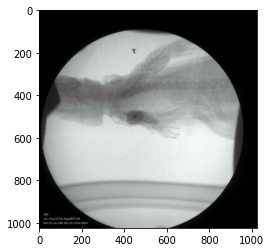

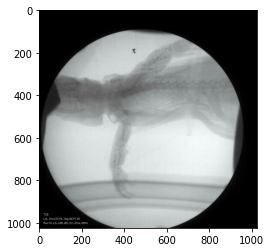

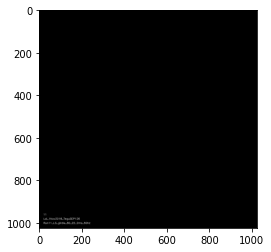

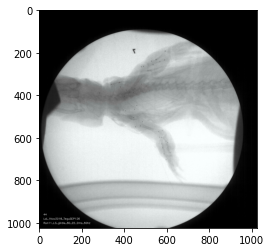

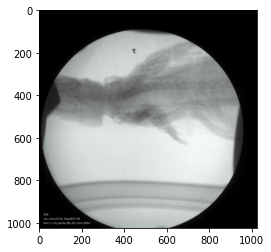

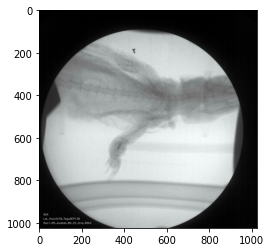

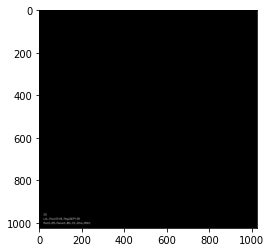

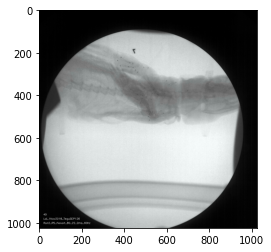

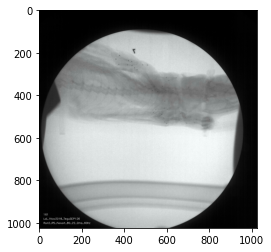

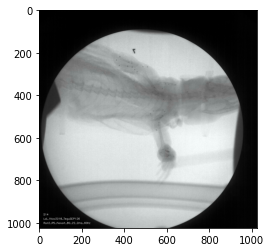

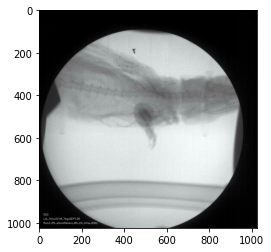

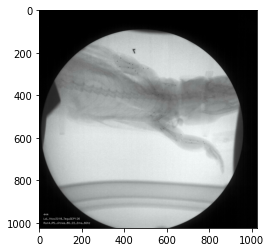

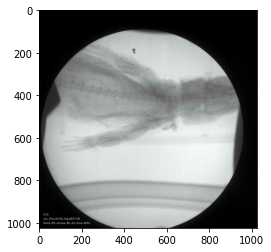

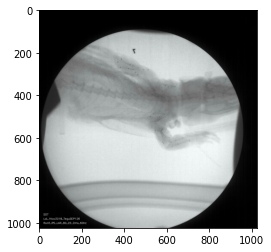

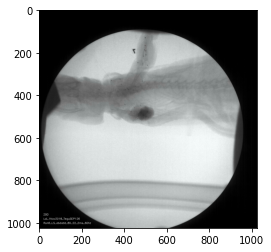

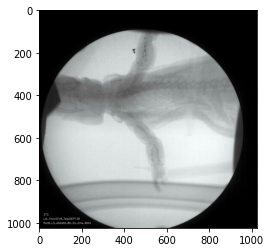

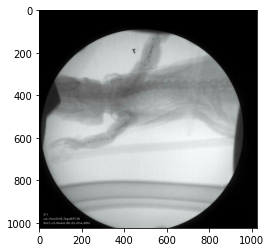

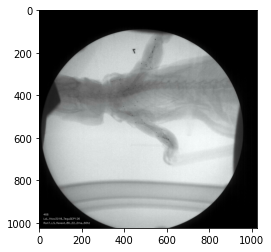

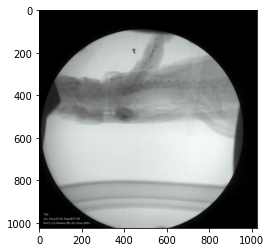

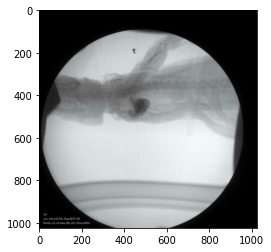

Finished extracting .pngs from c2_1Nov.mp4
Extracted 20 matching frames from each of 2 source videos
Updated config.yaml with event match_outliers at 16Jul20_02h43m34s
Updated config.yaml with event splitDlc2Xma at 16Jul20_02h44m42s
Successfully split DLC format to XMALab 2D points; saved ./dev/sm126-Phil-2020-06-09/labeled-data/1Nov_diff/machinelabels-iter0_split_16Jul20_02h44m42s.csv


In [ ]:
model.getOutliers(10, outlier_algo='jump')

In [ ]:
model

NameError: ignored

In [ ]:
model.config

{'Task': 'dv88_trilong_pec',
 'TrainingFraction': [0.95],
 'alphavalue': 0.7,
 'batch_size': 8,
 'bodyparts': ['Body_ds1_crn_cam1',
  'Body_ds1_crn_cam2',
  'Body_ds3_cdl_cam1',
  'Body_ds3_cdl_cam2',
  'Body_vn1_crn_cam1',
  'Body_vn1_crn_cam2',
  'Scapula_acr_cam1',
  'Scapula_acr_cam2',
  'Scapula_spi_cam1',
  'Scapula_spi_cam2',
  'Scapula_vtb_cam1',
  'Scapula_vtb_cam2',
  'Humerus_dpc_cam1',
  'Humerus_dpc_cam2',
  'Humerus_ent_cam1',
  'Humerus_ent_cam2',
  'Humerus_ect_cam1',
  'Humerus_ect_cam2',
  'Ulna_olc_cam1',
  'Ulna_olc_cam2',
  'Ulna_int_cam1',
  'Ulna_int_cam2',
  'Ulna_dst_cam1',
  'Ulna_dst_cam2',
  'Triceps_prx_cam1',
  'Triceps_prx_cam2',
  'Triceps_dst_cam1',
  'Triceps_dst_cam2'],
 'colormap': 'jet',
 'corner2move2': [512, 512],
 'cropping': False,
 'date': 'Jun9',
 'default_augmenter': 'default',
 'default_net_type': 'resnet_50',
 'dotsize': 12,
 'history': {'07Jul20_12h50m23s': {'files': ['./dev/dv88_trilong_pec-Phil-2020-06-09/labeled-data/14Feb_diff/Collecte

In [ ]:
trainposeconfigfile,testposeconfigfile,snapshotfolder=model.dlc.return_train_network_path(config_path,1,0.95)
cfg_dlc=model.dlc.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)
# cfg_dlc['augmentationprobability']=0.25
cfg_dlc['batch_size']=3
# cfg_dlc['hist_eq']=True
# cfg_dlc['gamma']=False
# cfg_dlc['logcontrast']=False
# cfg_dlc['allchannelsclahe']=True
cfg_dlc['optimizer'] ="sgd"
cfg_dlc['dataset_type']='imgaug'
# cfg_dlc['multi_step']=[[1e-4, 7500], [5*1e-5, 12000], [1e-5, 50000], [5e-6, 200000]]
cfg_dlc['global_scale']=1.0



# cfg_dlc['init_weights']= '/content/drive/My Drive/Development/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt'
# cfg_dlc['init_weights']=model.getLatestSnapshot(snapshotfolder) # to resume from latest snapshot

model.dlc.auxiliaryfunctions.write_plainconfig(trainposeconfigfile,cfg_dlc)

In [ ]:
model.dlc.train_network(config_path, saveiters=10000,displayiters=50,maxiters=300000,max_snapshots_to_keep=15, allow_growth=True)

In [ ]:
model.cleanup('15Jul20_22h13m07s')

/content/drive/My Drive/Development/DeepLabCut/deadROMM/possumPolish.py:299: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.config = ruamel.yaml.load(open(self.yaml))


Deleted 70 files associated with operation match_outliers at 15Jul20_22h13m07s
Deleted 2 directories associated with operation match_outliers at 15Jul20_22h13m07s


In [ ]:
model.dlc.analyze_videos(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'])

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30],
                [31],
                [32],
                [33],
                [34],
                [35],
                [36],
                [37],
                [38],
                [39],
                [40],
                [41],
                [42],
                [43]],
 'all_joints_names': ['Body_ds1_c

Using snapshot-245000 for model /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1
Initializing ResNet
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/train/snapshot-245000
Starting to analyze %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4


  0%|          | 0/7904 [00:00<?, ?it/s]

Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904  found with (before cropping) frame dimensions:  1024 1024
Starting to extract posture


7979it [06:07, 21.69it/s]

Detected frames:  7904
Saving results in /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


'DLC_resnet50_possum101_11AprApr13shuffle1_245000'

In [ ]:
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'])

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.


  0%|          | 13/7904 [00:00<01:05, 120.12it/s]

7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:13<00:00, 59.14it/s]


In [ ]:

model.dlc.filterpredictions(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'], filtertype="spline",windowlength=17)
model.dlc.create_labeled_video(config_path,['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4'],filtered=True)


4it [00:00, 39.50it/s]

Filtering with spline model /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4


44it [00:01, 38.13it/s]


Saving filtered csv poses!


  0%|          | 0/7904 [00:00<?, ?it/s]

Starting %  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos ['/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4']
Loading  /content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/videos/11Apr_diff.mp4 and data.
7904
Duration of video [s]:  263.47 , recorded with  30.0 fps!
Overall # of frames:  7904 with cropped frame dimensions:  1024 1024
Generating frames and creating video.


100%|██████████| 7904/7904 [02:16<00:00, 57.86it/s]


In [ ]:
model.dlc.create_training_dataset(model.yaml,windows2linux=True)

/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/training-datasets/iteration-3/UnaugmentedDataSet_possum101_11AprApr13  already exists!
Annotation data converted to unix format...
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/train  already exists!
/content/drive/My Drive/Development/DeadROMM/possum101_11Apr-Phil-2020-04-13-diff/dlc-models/iteration-3/possum101_11AprApr13-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([57, 62, 69, 32, 70,  1, 35, 29,  6, 66, 48, 79, 22, 44, 40, 36, 21,
           7, 10,  5, 43, 63,  8, 31, 55, 38, 33, 65, 41,  2, 73, 50, 24, 77,
          52, 53, 16, 64, 78, 67, 30, 72,  9, 71, 47, 75, 59, 23, 37, 19, 15,
          25, 76, 58, 20, 42, 14, 68, 74, 39, 49, 12, 56,  0, 46,  4, 27, 60,
          26, 34, 13, 54, 51, 45, 11, 28]), array([ 3, 17, 18, 61])))]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon May 25 22:14:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    34W / 250W |  15767MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  